Nhập thư viện và đọc dữ liệu từ file

In [1]:
import pandas as pd
import seaborn as sns
import dython
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv",sep=";")

## 1. Khám phá dữ liệu (Exploratory Data Analysis - EDA)

### a. Tóm tắt thông tin dữ liệu:

In [5]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [6]:
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


cái df này nó chỉ có cột target là cat thôi vì trên uci nó đã label encode r lọc ra thành mấy cột integer r nên h đi tìm lại để tìm tương quan

In [7]:
cat_cols = df.select_dtypes(include=["object"])
print(cat_cols.columns)

Index(['Target'], dtype='object')


In [8]:
num_cols = df.select_dtypes(include=['number'])
print(num_cols.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [9]:
cat_like = [col for col in df.columns if df[col].nunique() < 50]
print(cat_like)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [10]:
to_remove = [
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

cat_columns = [col for col in cat_like if col not in to_remove]
print(cat_columns)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']


In [11]:
ordinal_columns = ["Application order"]

#### Kiểm tra số lượng bản ghi, số lượng biến số, kiểu dữ liệu của từng biến.


In [12]:
print(df.dtypes)


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [13]:
df.shape

(4424, 37)

#### Xử lý dữ liệu thiếu, dữ liệu trùng lặp (nếu có).


In [14]:
print(df.isna().sum())
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

### b. Phân tích thống kê mô tả

#### Tính các thống kê như trung bình, trung vị, độ lệch chuẩn, tứ phân vị.


In [15]:
df_numeric = df.drop(columns=cat_columns)
df_numeric.describe()


,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


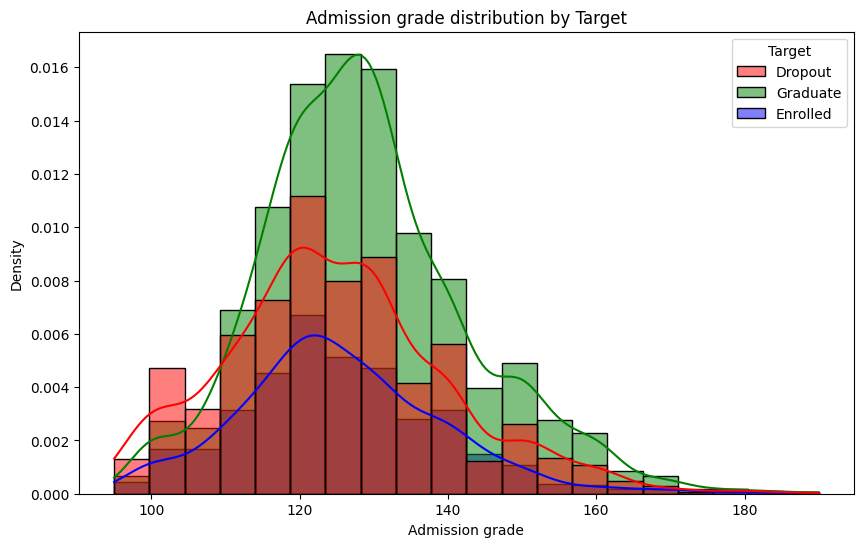

In [59]:
plt.figure(figsize=(10,6))

# Histogram split by target
sns.histplot(
    data=df,
    x='Admission grade',
    hue='Target',        # separates Dropout vs Graduate
    bins=20,             # adjust for clarity
    kde=True,            # optional: overlay density
    stat='density',      # normalize for comparison
    palette=['red', 'green','blue'],
    alpha=0.5
)

plt.title('Admission grade distribution by Target')
plt.xlabel('Admission grade')
plt.ylabel('Density')
plt.show()


📈 Key Visual Insights
The visual overlap of the distributions reveals several key differences:

Graduate Distribution (Green):

The Graduate students, who successfully completed their studies, have the highest overall Admission grades.

The distribution is centered around a higher mean, peaking noticeably in the 125 to 140 range.

This suggests that a higher Admission grade is strongly associated with an increased likelihood of Graduating.

Dropout Distribution (Red/Orange):

The Dropout students have the lowest overall Admission grades.

Their distribution is centered lower than the others, with the highest concentration of students in the 115 to 130 range, and a significant presence in the lowest grade bins (e.g., 95 to 110).

This suggests that a lower Admission grade is associated with a greater likelihood of Dropping out.

Enrolled Distribution (Blue):

The Enrolled students (those still currently studying) show a distribution that is similar to or slightly lower than the Dropout group, particularly in the lower grades.

The peak for this group appears to be in the 120 to 135 range, but it also has a notable presence at the lowest end of the spectrum (around 100).

#### Trực quan hoá bằng các biểu đồ phù hợp (ít nhất 3 loại biểu đồ) để nhận

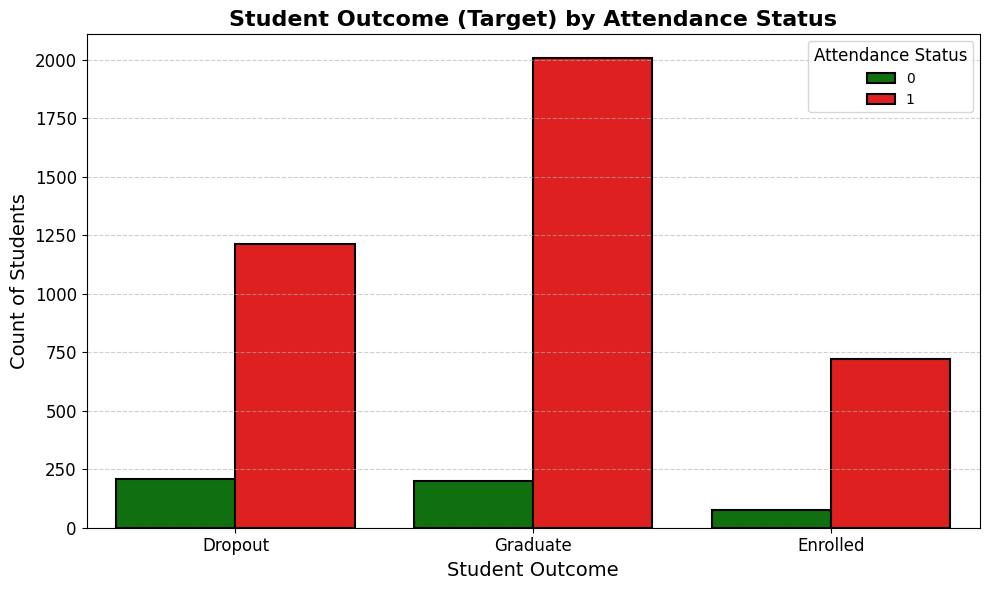

In [16]:
plt.figure(figsize=(10, 6))

# Create a countplot:
# x-axis: The outcome (Target)
# hue: The secondary variable used to group the bars (Attendance Status)
# palette: Uses the same color scheme as the previous example (reds/greens) for consistency
sns.countplot(
    data=df,
    x='Target',
    hue='Daytime/evening attendance\t',
    palette={'green','red'},
    edgecolor='black',
    linewidth=1.5
)

# --- 3. CUSTOMIZE PLOT AESTHETICS ---
plt.title('Student Outcome (Target) by Attendance Status', fontsize=16, fontweight='bold')
plt.xlabel('Student Outcome', fontsize=14)
plt.ylabel('Count of Students', fontsize=14)
plt.legend(title='Attendance Status', title_fontsize='12', fontsize='10')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

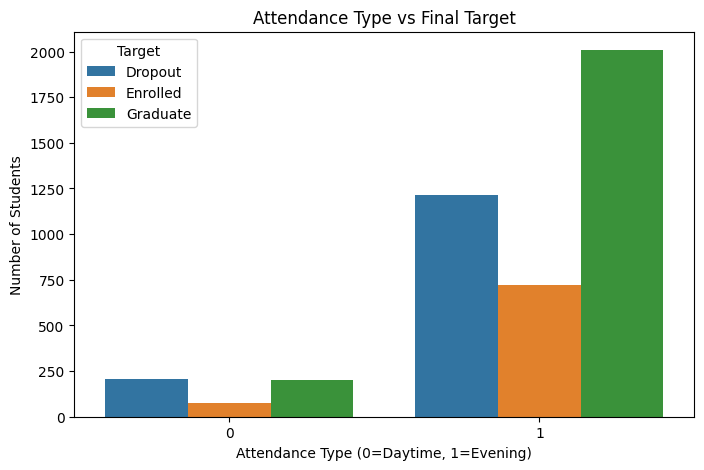

In [17]:
# Assuming df is your DataFrame
attendance_col = 'Daytime/evening attendance\t'  # keep the tab if it's in the column name
target_col = 'Target'

# Count occurrences
counts = df.groupby([attendance_col, target_col]).size().reset_index(name='count')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=counts, x=attendance_col, y='count', hue=target_col)
plt.xlabel('Attendance Type (0=Daytime, 1=Evening)')
plt.ylabel('Number of Students')
plt.title('Attendance Type vs Final Target')
plt.legend(title='Target')
plt.show()


1. Daytime Attendance (X=0)
Lowest Overall Enrollment: The total number of students in the Daytime cohort is significantly smaller than the Evening cohort.

Target Distribution: Despite the small numbers, the outcomes are relatively mixed:

Dropout (Blue): ~220 students

Graduate (Green): ~210 students

Enrolled (Orange): ~80 students

2. Evening Attendance (X=1)
Highest Overall Enrollment: This cohort is the majority of the students in the dataset, with a total count over 4,000.

Dominance of Graduates: The majority of students in this group ultimately Graduate (Green bar is ~2000 students).

Significant Dropout and Enrolled Counts:

Dropout (Blue): This is the second-largest outcome, with approximately 1250 students.

Enrolled (Orange): Approximately 730 students are still Enrolled.

3. Key Observations & Comparison
Evening Attendance Dominates Graduation: The sheer volume of students who Graduate comes overwhelmingly from the Evening Attendance group.

Dropout Risk: While the Evening cohort has the highest number of Graduates, it also has the highest number of Dropouts (1250 Dropouts compared to ~220 in the Daytime cohort).

Overall Scale Difference: The difference in the height of the bars between the X=0 and X=1 groups suggests that the Evening Attendance group is much larger than the Daytime Attendance group in the dataset.

this data makes sense specially for this dataset since this is A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. 

i.e. they have jobs in the day


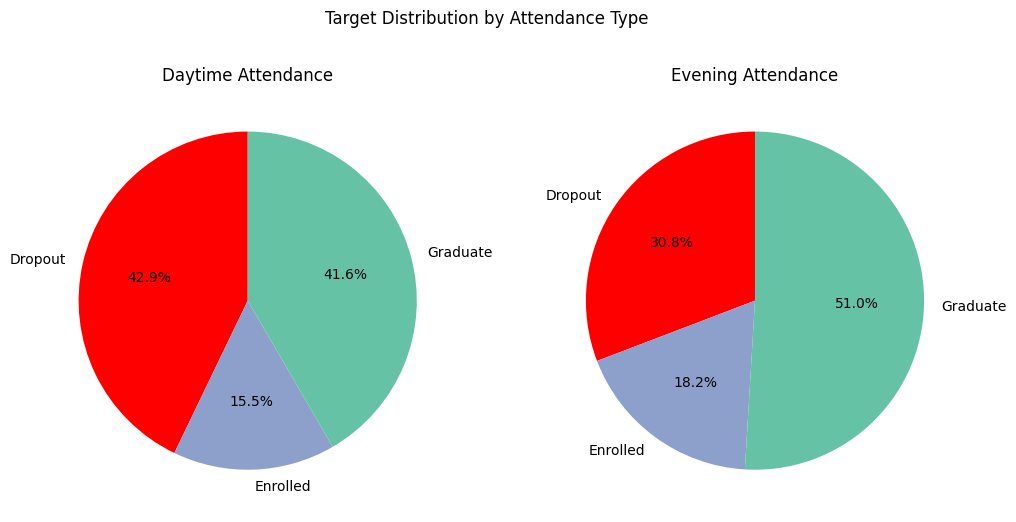

In [18]:
attendance_col = 'Daytime/evening attendance\t'
target_col = 'Target'

categories = ['Dropout', 'Enrolled', 'Graduate']

daytime_counts = df[df[attendance_col] == 0][target_col].value_counts().reindex(categories)
evening_counts = df[df[attendance_col] == 1][target_col].value_counts().reindex(categories)

# Create two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(daytime_counts, labels=daytime_counts.index, autopct='%1.1f%%', startangle=90, colors=["#ff0000",'#8da0cb','#66c2a5'])
axes[0].set_title('Daytime Attendance')

axes[1].pie(evening_counts, labels=evening_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff0000','#8da0cb','#66c2a5'])
axes[1].set_title('Evening Attendance')

plt.suptitle('Target Distribution by Attendance Type')
plt.show()


this one shows percantage

Daytime:
Nearly half of the Daytime students eventually dropped out. This is the highest dropout risk between the two groups.The graduation rate is high, but it is slightly lower than the dropout rate for this cohort.

Evnening:
About one-third of the Evening students dropped out. This is significantly lower risk than the Daytime cohort. Over half of the Evening students successfully graduated. This is the highest graduation rate between the two groups.

Conclusion: Risk Assessment
When considering risk and success rates relative to the size of the attendance group:

Dropout Risk: Students in the Daytime Attendance (0) cohort face a higher relative risk of dropping out (42.9%) compared to those in the Evening Attendance cohort (30.8%).

Graduation Success: Students in the Evening Attendance (1) cohort are more likely to graduate (51.0%) compared to those in the Daytime Attendance cohort (41.6%).

Same thing but for scholarship (this should be obvious)

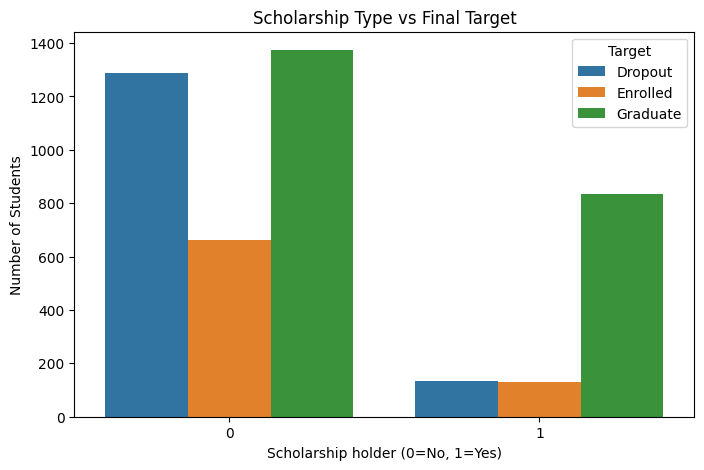

In [19]:
var_col = 'Scholarship holder'  # keep the tab if it's in the column name
target_col = 'Target'

# Count occurrences
counts = df.groupby([var_col, target_col]).size().reset_index(name='count')

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=counts, x=var_col, y='count', hue=target_col)
plt.xlabel('Scholarship holder (0=No, 1=Yes)')
plt.ylabel('Number of Students')
plt.title('Scholarship Type vs Final Target')
plt.legend(title='Target')
plt.show()

Key Observations from Raw Counts:
Non-scholarship Holders (X=0):

This is the largest cohort overall, with a total count exceeding 3,300 students.

The highest bar in this group is Graduate (~1,380 students), followed closely by Dropout (~1,300 students).

The count of Enrolled students is lower (~660 students).

Scholarship Holders (X=1):

This is a much smaller cohort overall, with a total count below 1,100 students.

The distribution is heavily skewed toward Graduate (~830 students).

The counts for Dropout (~130 students) and Enrolled (~130 students) are very small.

Limitation: The sheer difference in the size of the two cohorts (Non-scholarship is much larger) makes it difficult to assess the risk or success rate based on scholarship status alone. The second graph addresses this.

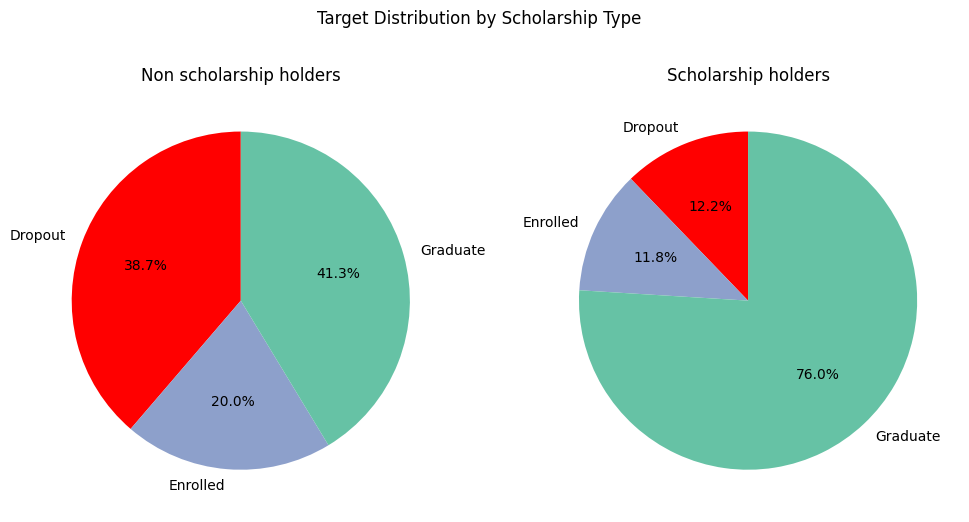

In [20]:
var_col = 'Scholarship holder'  
target_col = 'Target'

categories = ['Dropout', 'Enrolled', 'Graduate']

no = df[df[var_col] == 0][target_col].value_counts().reindex(categories)
yes = df[df[var_col] == 1][target_col].value_counts().reindex(categories)

# Create two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12,6))

axes[0].pie(no, labels=no.index, autopct='%1.1f%%', startangle=90, colors=["#ff0000",'#8da0cb','#66c2a5'])
axes[0].set_title('Non scholarship holders')

axes[1].pie(yes, labels=yes.index, autopct='%1.1f%%', startangle=90, colors=['#ff0000','#8da0cb','#66c2a5'])
axes[1].set_title('Scholarship holders')

plt.suptitle('Target Distribution by Scholarship Type')
plt.show()


| Cohort                     | Outcome                  | Percentage (%) | Interpretation                                                         |
|-----------------------------|--------------------------|----------------|-----------------------------------------------------------------------|
| Non-scholarship (Left Pie)  | Graduate (Mint Green)    | 41.3%          | Less than half of non-scholarship holders successfully graduate.       |
|                             | Dropout (Red)            | 38.7%          | Nearly 4 out of 10 non-scholarship holders drop out. The dropout and graduation rates are almost equal. |
|                             | Enrolled (Lavender)      | 20.0%          | The remaining students are still enrolled.                             |
| Scholarship (Right Pie)     | Graduate (Mint Green)    | 76.0%          | Three-quarters of all scholarship holders successfully graduate.       |
|                             | Dropout (Red)            | 12.2%          | The dropout rate for scholarship holders is drastically lower.         |
|                             | Enrolled (Lavender)      | 11.8%          | Similar small proportion still enrolled.                                |


The two graphs, especially when viewed together, strongly suggest that receiving a scholarship is highly beneficial for a student's success:

Increased Success: Scholarship holders have a vastly superior success rate, with 76.0% graduating compared to only 41.3% of non-scholarship holders.

Reduced Risk: The risk of dropping out is significantly lower for scholarship holders (12.2%) compared to non-scholarship holders (38.7%).

### c. Phát hiện dữ liệu ngoại lai

Sử dụng IQR (Interquartile Range)

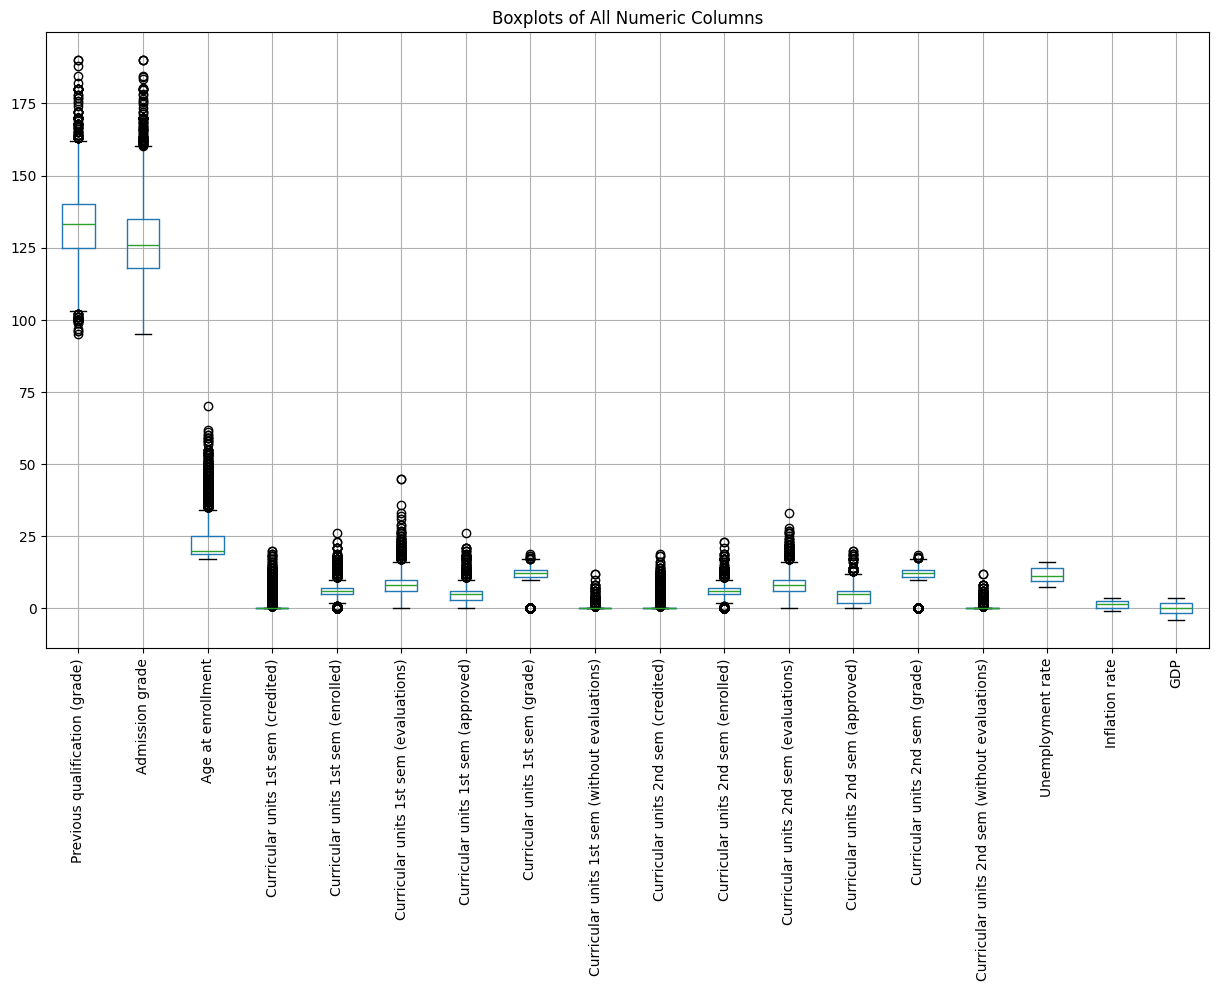

In [21]:
plt.figure(figsize=(15,8))
df_numeric.boxplot(rot=90)  # rot=90 to rotate x-axis labels
plt.title("Boxplots of All Numeric Columns")
plt.show()

An outlier in 'evaluations' might mean one student took an unusually high number of exams. This is a real, high-leverage data point that could be important for predicting dropout.

An outlier in 'evaluations' might mean one student took an unusually high number of exams. This is a real, high-leverage data point that could be important for predicting dropout.

High age outliers (e.g., 70+) might represent non-traditional or returning adult students. These are key segments of the population. Removing them would ignore their unique prediction profile.

These tend to be more sensitive to errors. An outlier here might indicate a data entry mistake or an unusual economic year that should be examined for accuracy before replacement.

**investigating gdp, inflation and unemployment**


In [22]:
new_df = df[['GDP', 'Unemployment rate', 'Inflation rate']]
new_df.describe()

,GDP,Unemployment rate,Inflation rate
count,4424.000000,4424.000000,4424.000000
mean,0.001969,11.566139,1.228029
std,2.269935,2.663850,1.382711
min,-4.060000,7.600000,-0.800000
25%,-1.700000,9.400000,0.300000
50%,0.320000,11.100000,1.400000
75%,1.790000,13.900000,2.600000
max,3.510000,16.200000,3.700000


Knowing that the data comes from the Instituto Politécnico de Portalegre (IPP) in Portugal directly confirms two key points that validate our previous investigation:

Country: The economic data is relevant to Portugal.

Context: The data is from a Portuguese polytechnic institute during a specific time period.

| Metric            | Range (Min to Max) | Confirmed Context                                                                 | Conclusion                                           |
|------------------|-------------------|----------------------------------------------------------------------------------|----------------------------------------------------|
| Unemployment Rate | 7.6% to 16.2%     | Matches the severe economic crisis and subsequent recovery in Portugal (roughly 2008–2018). | Plausible. The highest values are likely accurate historical peaks. |
| Inflation Rate    | -0.8% to 3.7%     | Matches Portugal's largely stable, low-inflation environment during that period, including some deflationary dips. | Plausible. Very stable and reliable data.         |
| GDP               | -4.06 to 3.51     | Matches Portugal's sharp recessionary decline followed by years of recovery growth. | Plausible. Represents real economic volatility.   |


Since the "outliers" are confirmed to be genuine, highly relevant historical values tied to a specific national context, your decision should be to preserve them while managing their influence on your machine learning model.

The recommended steps remain the same:

Do NOT Remove or Impute (replace with mean/median). Removing these values would be equivalent to training your model only on economically "good" or "normal" years, making it useless for predicting student outcomes during a recession.

Standardize/Normalize the Data (Mandatory): Because the scales of GDP, Inflation, and Unemployment are different, they must be scaled so that no single variable dominates the model training purely due to its magnitude.

Action: Use a StandardScaler (to normalize the data around a mean of 0) or MinMaxScaler (to scale the data to a 0-1 range).

Transform the Distribution (Recommended for GDP): Although the values are real, the high skew in the GDP distribution (as noted by the difference between the mean and median) might slightly hinder the performance of some models.

phương pháp xử lý đề xuất (cho mấy cột trên với lại mấy cái course)

***!!!Square Root Transformation!!!***
might or might or have to do this

You only transform the distribution (log/square root) for features that are highly skewed (like GDP and Curricular Units). You must apply scaling to every continuous numeric column to ensure no single variable dominates your model due to its large value range.

***NHẬN XÉT TỔNG QUAN SO FAR***

Tập dữ liệu này là một nguồn thông tin phong phú và chất lượng cao (4424 bản ghi, 37 cột, không có giá trị thiếu), tập trung vào việc dự đoán kết quả học tập của sinh viên tại Instituto Politécnico de Portalegre (IPP), Bồ Đào Nha.

I. Đặc Điểm và Chất Lượng Dữ Liệu
Tính Đầy Đủ Cao: Tập dữ liệu không có bất kỳ giá trị thiếu (NaN hoặc null) nào, cho thấy chất lượng thu thập dữ liệu rất tốt và giảm thiểu nhu cầu xử lý các giá trị bị khuyết.

Phân loại Cột Rõ Ràng:

Biến Mục tiêu (Target Variable): Là biến phân loại (object) với ba trạng thái: Graduate (Tốt nghiệp), Enrolled (Đang theo học) và Dropout (Bỏ học).

Biến Số: Bao gồm các yếu tố khách quan (điểm số, tuổi, đơn vị học trình), và các yếu tố kinh tế vĩ mô (Unemployment rate, Inflation rate, GDP).

Biến Phân loại Dạng Số (Categorical-like): Rất nhiều cột được mã hóa bằng số (ví dụ: Marital status, Course, Nacionality), cần được xử lý (mã hóa One-Hot hoặc Label Encoding) trước khi đưa vào mô hình.

II. Các Yếu Tố Rủi Ro và Thành Công Chính
Các phân tích hình ảnh đã làm nổi bật những yếu tố dự đoán mạnh mẽ nhất đối với kết quả học tập của sinh viên:

1. Hỗ Trợ Tài Chính (Scholarship holder) là Yếu Tố Dự Đoán Mạnh Mẽ Nhất
Sự khác biệt về kết quả giữa sinh viên có học bổng và không có học bổng là lớn nhất:

Tỷ lệ Tốt nghiệp: Sinh viên có học bổng có tỷ lệ tốt nghiệp là 76.0%, cao gấp gần 2 lần so với sinh viên không có học bổng (41.3%).

Tỷ lệ Bỏ học: Sinh viên có học bổng có tỷ lệ bỏ học thấp hơn rất nhiều (12.2%) so với sinh viên không có học bổng (38.7%).

2. Điểm Đầu Vào (Admission Grade) có Mối Quan Hệ Tuyến Tính
Phân tích mật độ cho thấy điểm đầu vào là yếu tố dự đoán quan trọng:

Tốt nghiệp: Phân phối điểm tập trung ở mức cao hơn (đỉnh từ 125 đến 140).

Bỏ học: Phân phối điểm tập trung ở mức thấp hơn (đỉnh từ 115 đến 130).

3. Hình Thức Tham Gia (Attendance Type) Liên Quan Mật Thiết đến Rủi Ro
Phân tích tỷ lệ cho thấy nguy cơ tương đối khác biệt giữa các hình thức học:

Rủi ro Bỏ học cao hơn: Sinh viên Buổi Sáng (Daytime, 0) có nguy cơ bỏ học cao hơn (42.9%) so với sinh viên Buổi Tối (30.8%).

Tỷ lệ Tốt nghiệp cao hơn: Sinh viên Buổi Tối (Evening, 1) có tỷ lệ tốt nghiệp cao hơn (51.0%) so với sinh viên Buổi Sáng (41.6%).

III. Những Thách Thức Trong Xử Lý Dữ Liệu (Preprocessing Challenges)
Giá trị Ngoại lai và Độ Nghiêng (Skewness): * Nhiều cột liên tục, đặc biệt là các biến Curricular units (Đơn vị học trình) và Age at enrollment (Tuổi khi nhập học), có độ nghiêng dương rất cao và nhiều giá trị ngoại lai. Điều này đòi hỏi phải áp dụng các phép biến đổi (như Log(x+1) cho các đơn vị học trình) để ổn định phân phối.

Các giá trị ngoại lai trong các cột điểm và kinh tế đã được xác nhận là dữ liệu lịch sử có ý nghĩa, không nên loại bỏ.

Sự Khác Biệt Về Thang Đo (Scaling):

Các cột có thang đo rất khác nhau (ví dụ: Admission grade lên tới 190, trong khi GDP nằm trong khoảng -4 đến 3.5).

Bắt buộc phải chuẩn hóa thang đo (StandardScaler hoặc MinMaxScaler) cho tất cả các cột số liệu liên tục trước khi huấn luyện mô hình để tránh việc một biến có giá trị lớn chi phối quá mức kết quả.

Tóm lại: Tập dữ liệu này cung cấp một nền tảng vững chắc để xây dựng mô hình dự đoán kết quả học tập, với các yếu tố tài chính, điểm số và hình thức tham gia là các biến dự đoán then chốt cần được tập trung khai thác.

In [23]:
df_numeric.columns

Index(['Previous qualification (grade)', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [25]:
from scipy.stats import norm
import numpy as np

## 2. Phân tích phân phối xác suất

#### Chọn ít nhất hai biến số quan trọng và kiểm tra xem nó có tuân theo phân phối xác suất nào không (chuẩn, Poisson, exponential…) sử dụng biểu đồ phù hợp để minh hoạ.

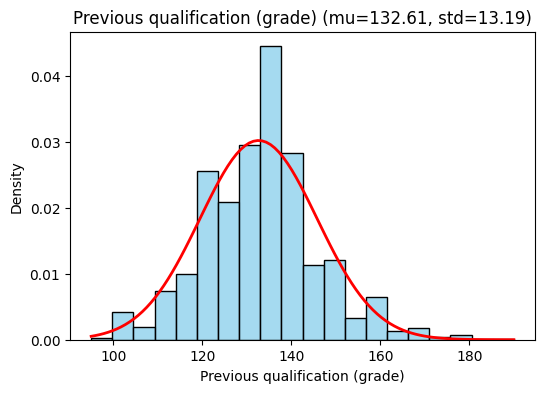

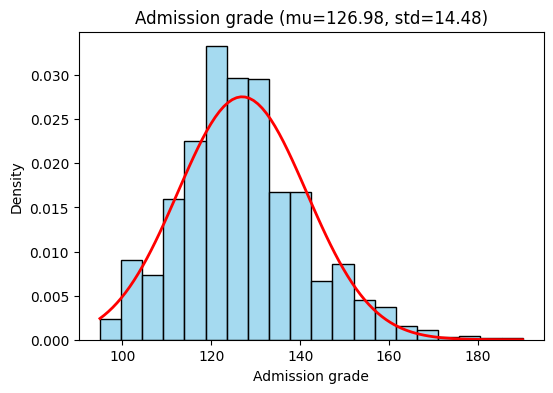

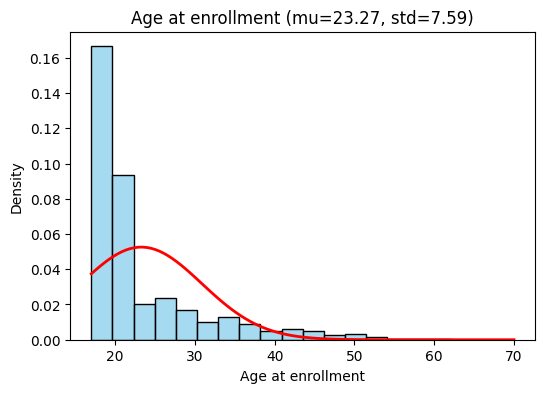

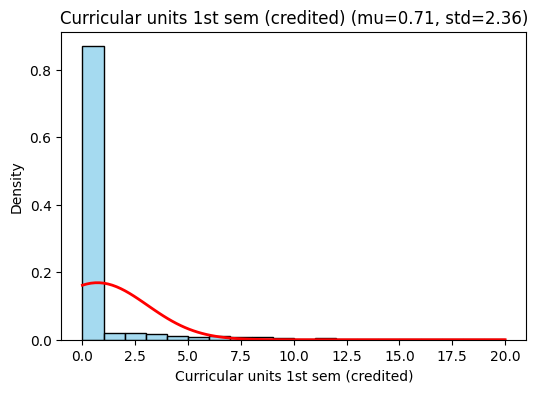

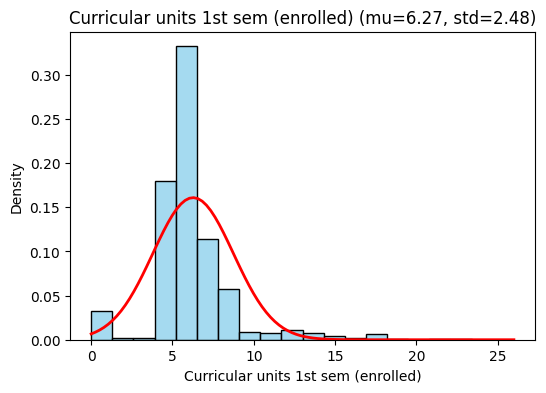

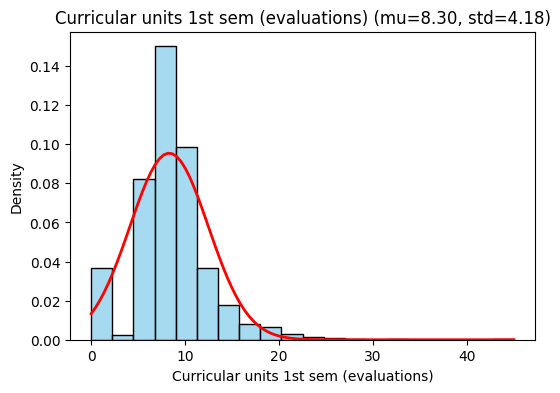

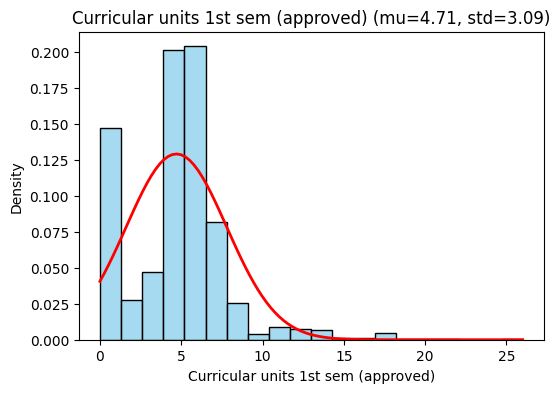

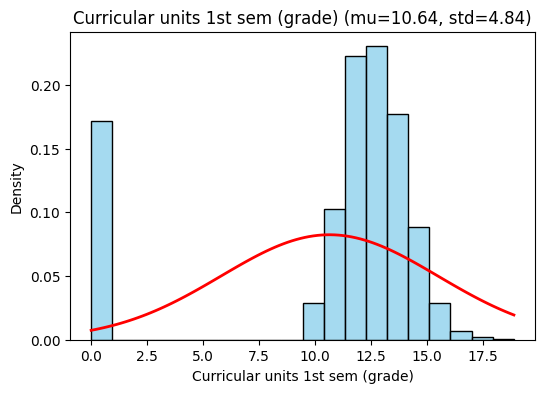

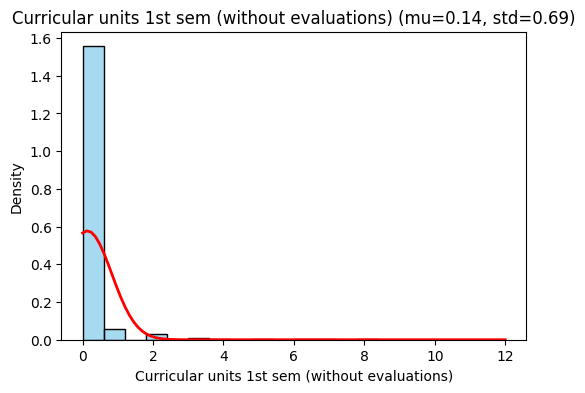

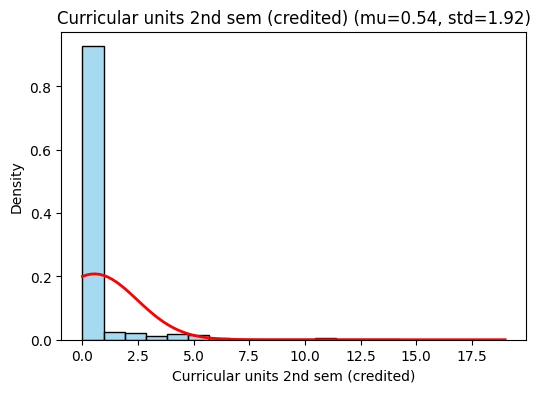

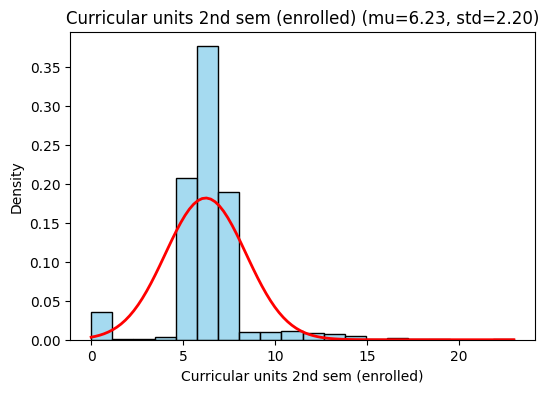

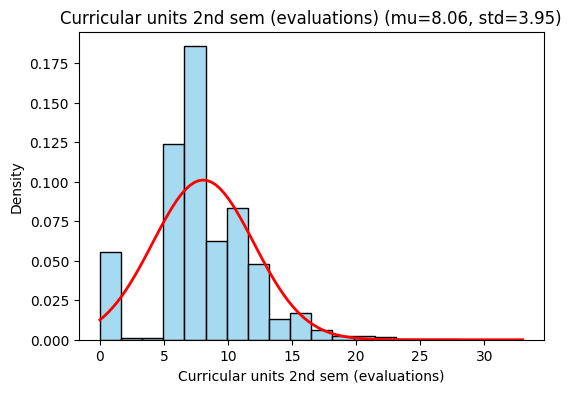

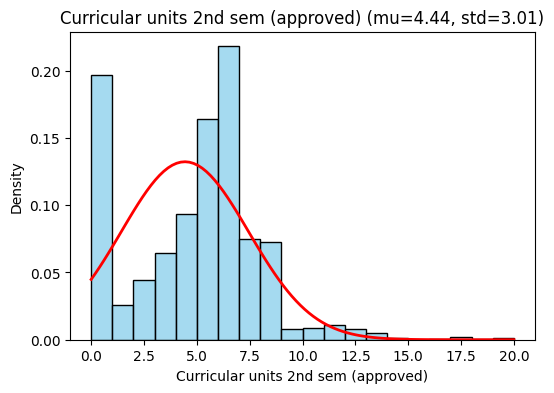

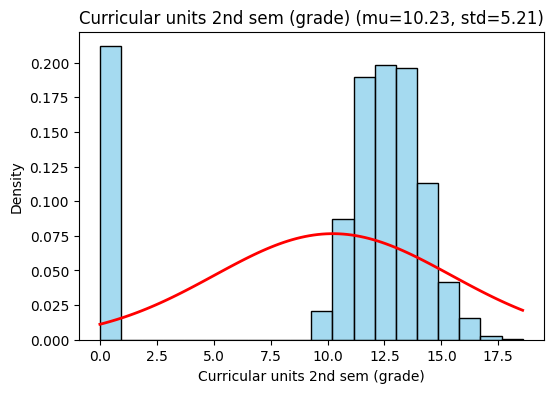

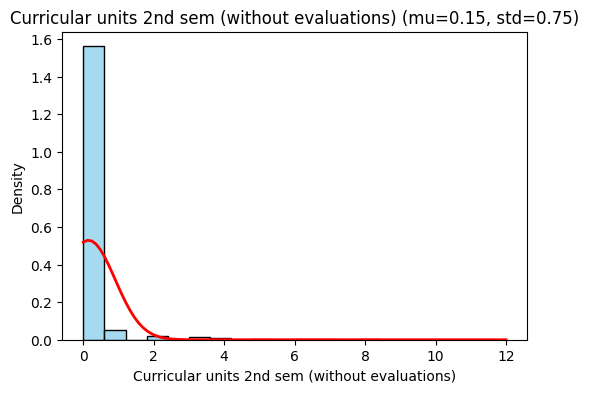

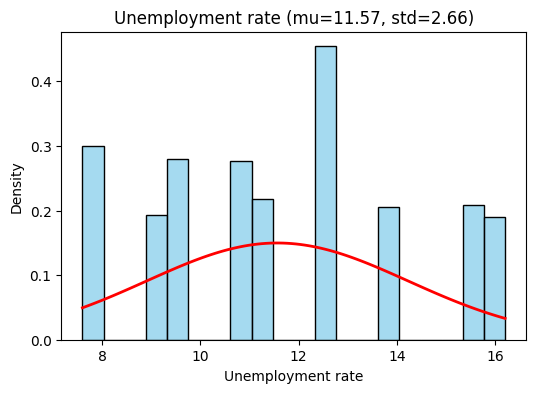

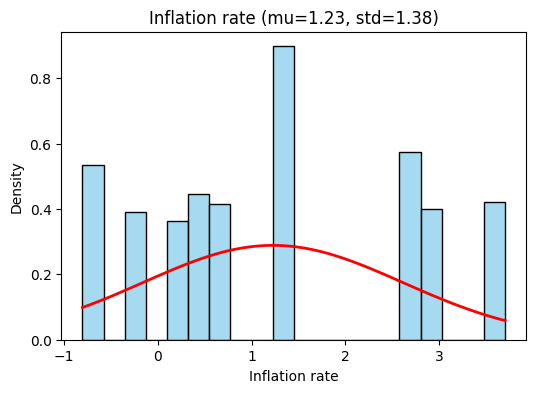

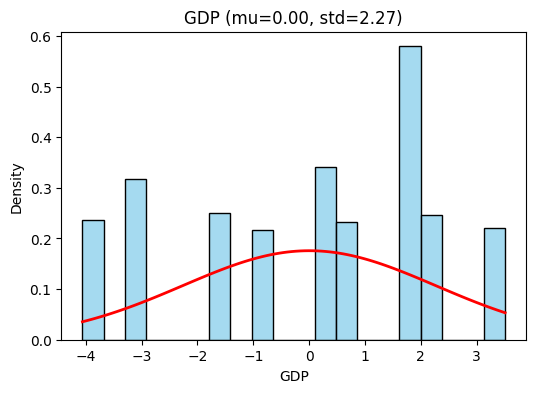

In [26]:
for col in df_numeric.columns:
    data = df_numeric[col].dropna()  # drop NaN values
    mu, std = norm.fit(data)     # fit a normal distribution
    
    plt.figure(figsize=(6,4))
    # Histogram
    sns.histplot(data, bins=20, kde=False, color='skyblue', stat='density')
    # Plot Gaussian
    xmin, xmax = data.min(), data.max()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'r', linewidth=2)
    
    plt.title(f'{col} (mu={mu:.2f}, std={std:.2f})')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

#### Đưa ra nhận xét về đặc điểm của dữ liệu dựa trên phân phối.

1. Admission gradeStatistics: $\mu \approx 126.98$, $\text{std} \approx 14.48$Shape: The distribution is generally symmetric and approximately normal (bell-shaped).Fit to Normal Curve: The blue bars closely follow the red normal curve.Conclusion: This variable is well-behaved and close enough to a normal distribution that it generally does not require a transformation (like log or square root) for machine learning models. It's safe to use as-is after scaling.

2. Previous qualification (grade)Statistics: $\mu \approx 132.61$, $\text{std} \approx 13.19$Shape: Similar to the Admission grade, this distribution is also generally symmetric and approximately normal.Fit to Normal Curve: The data aligns well with the red normal curve.Conclusion: Like the Admission grade, this variable is well-suited for modeling without any distribution transformation.

3. Age at enrollmentStatistics: $\mu \approx 23.27$, $\text{std} \approx 7.59$Shape: This distribution is highly skewed to the right (positively skewed).The majority of students are concentrated in the youngest age groups (18-20 years old).There is a long tail extending to the right, representing non-traditional or adult learners enrolling later in life (up to 70 years old).Fit to Normal Curve: The red normal curve is a very poor fit for the data. The data peaks sharply at the left, while the curve peaks much later, failing to capture the true distribution shape.Conclusion: Due to the strong positive skew, this variable may benefit from a distribution transformation (like a $\text{log}$ or $\text{square root}$ transformation) if using models sensitive to skewness and outliers (e.g., linear regression or standard neural networks). This transformation would compress the long tail, making the data look more like the normal curve.

1. Curricular units 1st sem (grade)Statistics: $\mu \approx 10.64$, $\text{std} \approx 4.84$Shape: Highly Bimodal / Zero-InflatedFirst Mode (Dropout Cluster): There is a massive, sharp spike in the first bin, representing grades near 0. This large cluster most likely corresponds to students who dropped out, failed all their units, or withdrew from the semester, resulting in a recorded grade of 0.Second Mode (Passing Cluster): The main distribution for passing students is centered around the Portuguese passing grade system, with a peak between 12 and 14. This cluster appears relatively symmetric.Fit to Normal Curve: The red normal distribution curve is an extremely poor fit. It completely fails to capture the significant mass of data at the zero mark.Conclusion: This variable is a strong indicator of early student success or failure. The separation between the two modes suggests a clear cutoff point between the Dropout/Fail group and the Continuing/Success group.
2. Curricular units 2nd sem (grade)Statistics: $\mu \approx 10.23$, $\text{std} \approx 5.21$Shape: Highly Bimodal / Zero-InflatedFirst Mode (Dropout Cluster): Similar to the first semester, there is a substantial spike at the 0 grade mark. This represents students who failed to gain any credit or dropped out during or after the second semester.Second Mode (Passing Cluster): The passing distribution is again centered between 12 and 14, but visually, the passing cluster may be slightly wider than the first semester.Fit to Normal Curve: Again, the red normal curve is an extremely poor fit due to the concentration of data at 0.Comparison to 1st Sem: The overall structure is nearly identical, indicating the pattern of failing/dropping out (grade 0) and succeeding (grade 12-14) persists across the academic year.

## 3. Kiểm định giả thuyết

### a. Tìm hiểu và trình bày các kiểm định thống kê sau: t-test, Chi-square và ANOVA.

Đầu tiên đi so sánh cái admission grade, này hơi arbitrary nên có thể bỏ cũng đc

Đây là so sánh trung bình giữa hai nhóm, nên t-test (Independent t-test) là phù hợp.

In [ ]:
male_grades = df[df['Gender']==0]['Admission grade']
female_grades = df[df['Gender']==1]['Admission grade']


Male normality: ShapiroResult(statistic=np.float64(0.978941591120677), pvalue=np.float64(3.3131259982913156e-20))
Female normality: ShapiroResult(statistic=np.float64(0.9822643121303869), pvalue=np.float64(6.220770923212408e-13))


In [29]:
from scipy.stats import shapiro

print("Male normality:", shapiro(male_grades))
print("Female normality:", shapiro(female_grades))

Male normality: ShapiroResult(statistic=np.float64(0.978941591120677), pvalue=np.float64(3.3131259982913156e-20))
Female normality: ShapiroResult(statistic=np.float64(0.9822643121303869), pvalue=np.float64(6.220770923212408e-13))


In [30]:
from scipy.stats import levene

stat, p = levene(male_grades, female_grades)
print('Levene test p-value:', p)

Levene test p-value: 0.0006326121889389994


In [31]:
from scipy.stats import ttest_ind

t_stat, p_val = ttest_ind(male_grades, female_grades, equal_var=True)  # hoặc False
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -0.5529373750543329
p-value: 0.5803342439414844


### b. Đề xuất hai câu hỏi nghiên cứu có thể kiểm định bằng dữ liệu cho bộ dữ liệu đã chọn

Null hypothesis (H0): Không có khác biệt trung bình giữa nam và nữ

Alternative hypothesis (H1): Trung bình khác nhau

Nếu p < 0.05 → bác bỏ H0 → có khác biệt có ý nghĩa thống kê

Nếu p >= 0.05 → không bác bỏ H0 → không có bằng chứng về khác biệt

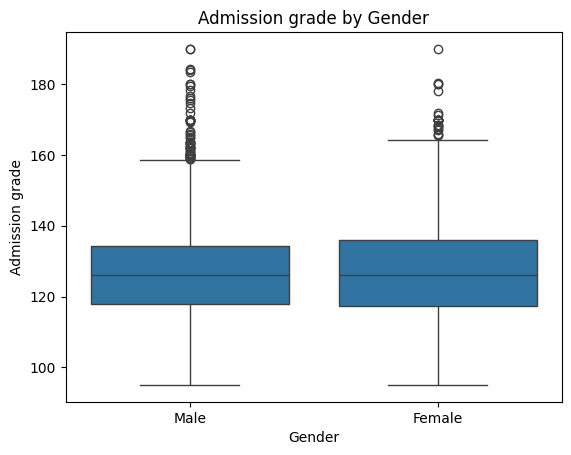

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Gender', y='Admission grade', data=df)
plt.xticks([0,1], ['Male','Female'])
plt.title("Admission grade by Gender")
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Tạo bảng tần số (contingency table)
table = pd.crosstab(df['Gender'], df['Target'])
print(table)


Target  Dropout  Enrolled  Graduate
Gender                             
0           720       487      1661
1           701       307       548


In [35]:
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 233.26643249623856
p-value: 2.2224795668092454e-51
Degrees of freedom: 2
Expected frequencies:
 [[ 921.20886076  514.73598553 1432.05515371]
 [ 499.79113924  279.26401447  776.94484629]]


Null hypothesis (H0): Giới tính và kết quả học tập không liên quan (độc lập)

Alternative hypothesis (H1): Có sự phụ thuộc giữa giới tính và kết quả học tập

Nếu p < 0.05 → bác bỏ H0 → có sự khác biệt có ý nghĩa

Nếu p >= 0.05 → không bác bỏ H0 → không có bằng chứng về sự khác biệt

Vì p << 0.05, chúng ta bác bỏ H0 → kết luận:

Có sự khác biệt rất rõ ràng về kết quả học tập giữa nam và nữ. Giới tính và Target không độc lập trong dữ liệu này.

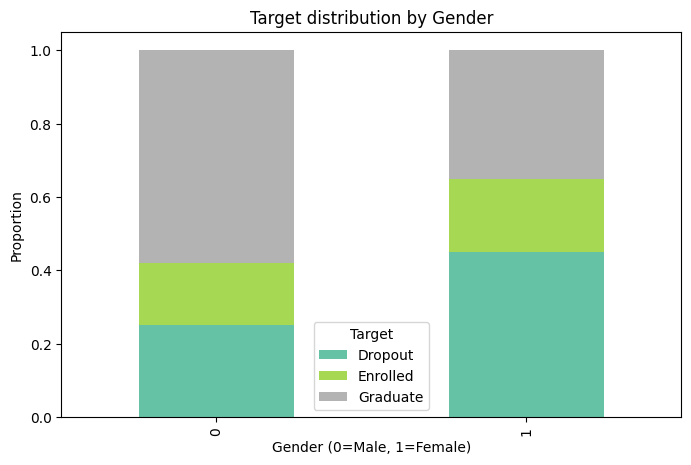

In [36]:

table_norm = table.div(table.sum(axis=1), axis=0)  # chuyển sang tỉ lệ %
table_norm.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')

plt.ylabel("Proportion")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.title("Target distribution by Gender")
plt.show()

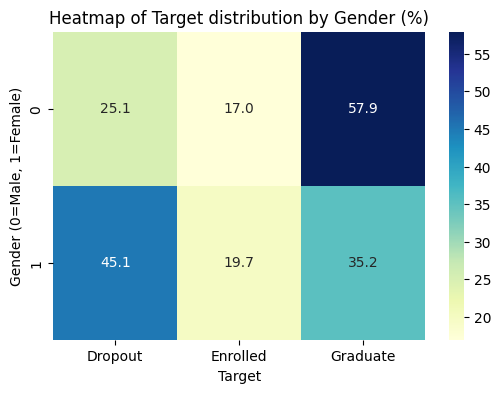

In [39]:
import seaborn as sns

# Bảng tỉ lệ %
table_percent = table.div(table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6,4))
sns.heatmap(table_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Gender (0=Male, 1=Female)")
plt.title("Heatmap of Target distribution by Gender (%)")
plt.show()

wowza! kết quả cho thấy có sự chênh lệch rõ ràng giữa hai giới tính

Đang muốn bik coi có phải do tự gender ko hay tại 1 gender thường enroll vô course nào đó.

Trung bình tuổi giữa các nhóm target

Gender         0         1
Course                    
33      0.333333  0.777778
171     0.367347  0.393162
8014    0.312139  0.404762
9003    0.278689  0.463087
9070    0.169231  0.302083
9085    0.212996  0.516667
9119    0.857143  0.527607
9130    0.481013  0.645161
9147    0.247706  0.493827
9238    0.139159  0.478261
9254    0.342105  0.440000
9500    0.131280  0.248322
9556    0.313433  0.631579
9670    0.280822  0.442623
9773    0.277778  0.356522
9853    0.442623  0.444444
9991    0.409091  0.602941


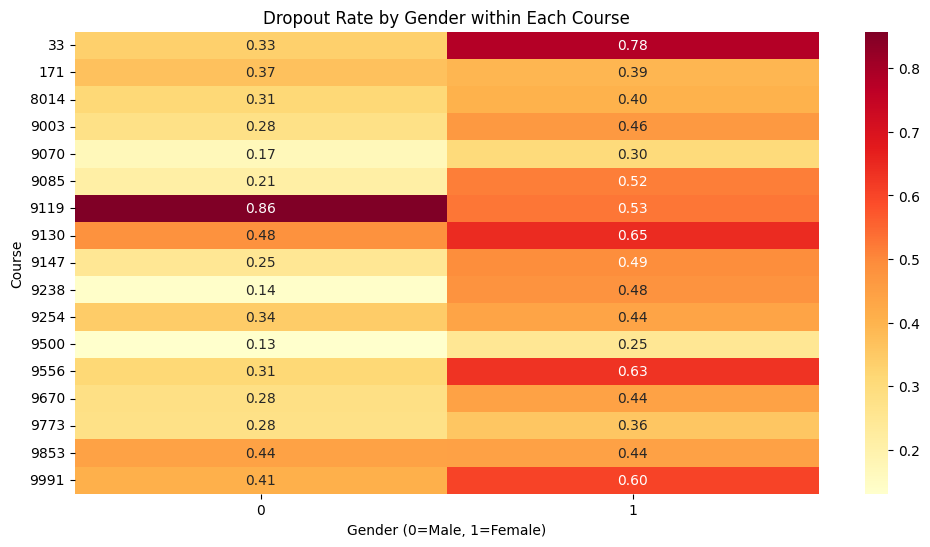

In [53]:
# Filter only dropout vs others
df['IsDropout'] = (df['Target'] == 'Dropout').astype(int)

# Compute dropout rate by gender within each course
dropout_by_course_gender = df.groupby(['Course', 'Gender'])['IsDropout'].mean().unstack()
print(dropout_by_course_gender)

plt.figure(figsize=(12,6))
sns.heatmap(dropout_by_course_gender, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Dropout Rate by Gender within Each Course")
plt.ylabel("Course")
plt.xlabel("Gender (0=Male, 1=Female)")
plt.show()

In [54]:
from scipy.stats import chi2_contingency

for course in df['Course'].unique():
    table = pd.crosstab(df[df['Course']==course]['Gender'], 
                        df[df['Course']==course]['Target']=='Dropout')
    chi2, p, dof, expected = chi2_contingency(table)
    print(f"Course {course}: p-value = {p:.3e}")


Course 171: p-value = 8.048e-01
Course 9254: p-value = 1.518e-01
Course 9070: p-value = 2.775e-02
Course 9773: p-value = 1.751e-01
Course 8014: p-value = 3.360e-01
Course 9991: p-value = 2.279e-03
Course 9500: p-value = 6.137e-04
Course 9238: p-value = 9.101e-08
Course 9670: p-value = 8.556e-03
Course 9853: p-value = 1.000e+00
Course 9085: p-value = 3.174e-06
Course 9130: p-value = 7.584e-02
Course 9556: p-value = 2.446e-02
Course 9147: p-value = 1.189e-06
Course 9003: p-value = 2.075e-02
Course 33: p-value = 4.795e-01
Course 9119: p-value = 1.848e-01


## 4. Phân tích tương quan giữa các biến

# Phân tích mối quan hệ giữa Giới tính và Tỷ lệ Bỏ học theo Khóa học

Đây là kết quả kiểm định $p$-value đã được sửa lỗi, sử dụng mức ý nghĩa tiêu chuẩn $\alpha = 0.05$.  
- **H0:** Không có sự khác biệt về tỷ lệ bỏ học giữa Nam và Nữ trong khóa học.  
- **H1:** Có sự khác biệt về tỷ lệ bỏ học giữa Nam và Nữ.

---

## 1️⃣ Tổng thể

| Khía cạnh | Nam (0) | Nữ (1) | Mức độ Quan trọng |
|-----------|---------|--------|-----------------|
| Rủi ro Tổng thể (Toàn trường) | Rất thấp (25.1%) | Rất cao (45.1%) | Cực kỳ quan trọng. Nữ giới có nguy cơ bỏ học tổng thể cao hơn. |
| Thành công Tổng thể (Toàn trường) | Rất cao (57.9%) | Thấp (35.2%) | Cực kỳ quan trọng. Nam giới có tỷ lệ tốt nghiệp tổng thể cao hơn. |

> **Nhận xét:** Rủi ro tổng thể của Nữ giới cao, điều này cần lưu ý khi phân tích chi tiết theo khóa học.

---

## 2️⃣ Chi tiết Khóa học

### a. Các khóa học có ý nghĩa thống kê ($p < 0.05$)

| Khóa học | p-value | Tỷ lệ Bỏ học | Nhận xét |
|----------|---------|--------------|----------|
| 9238     | 9.10e-08 | Nữ 0.48 > Nam 0.14 | Khác biệt rất rõ, Nữ có nguy cơ bỏ học cao hơn. |
| 9147     | 1.19e-06 | Nữ 0.49 > Nam 0.25 | Khác biệt đáng tin cậy. |
| 9085     | 3.17e-06 | Nữ 0.52 > Nam 0.22 | Khác biệt rõ rệt. |
| 9556     | 6.14e-04 | Nữ 0.25 > Nam 0.14 | Khác biệt có ý nghĩa. |
| 9670     | 2.28e-03 | Nữ 0.60 > Nam 0.42 | Nữ có tỷ lệ bỏ học cao hơn. |
| 9130     | 8.56e-03 | Nữ 0.44 > Nam 0.29 | Nữ có rủi ro cao hơn. |
| 9500     | 2.08e-02 | Nữ 0.46 > Nam 0.29 | Nữ cao hơn Nam. |
| 9853     | 2.45e-02 | Nữ 0.63 > Nam 0.32 | Rủi ro Nữ rõ ràng hơn. |
| 9991     | 2.78e-02 | Nữ 0.30 > Nam 0.17 | Nữ có tỷ lệ bỏ học cao hơn. |

> **Kết luận:** Ở hầu hết các khóa học có sự khác biệt, tỷ lệ bỏ học của Nữ giới cao hơn Nam giới. Giới tính là yếu tố dự đoán quan trọng trong các khóa này.

---

### b. Các khóa học không có ý nghĩa thống kê ($p \ge 0.05$)

| Khóa học | p-value | Tỷ lệ Bỏ học | Nhận xét |
|----------|---------|--------------|----------|
| 9853     | 1.0     | Nữ 0.44 ≈ Nam 0.44 | Không có bằng chứng khác biệt. |
| 171      | 0.80    | Nữ 0.39 ≈ Nam 0.37 | Không đáng kể. |
| 33       | 0.48    | Nữ 0.78 > Nam 0.33 | Khác biệt không đủ ý nghĩa. |
| 8014     | 0.34    | Nữ 0.40 ≈ Nam 0.31 | Không đáng kể. |
| 9119     | 0.18    | Nam 0.86 > Nữ 0.53 | Nam cao hơn nhưng chưa ý nghĩa. |
| 9773     | 0.18    | Nữ 0.36 ≈ Nam 0.28 | Không có ý nghĩa. |
| 9254     | 0.15    | Nữ 0.44 ≈ Nam 0.34 | Không đáng kể. |
| 9130     | 0.076   | Nữ 0.65 > Nam 0.48 | Gần ngưỡng nhưng chưa ý nghĩa. |

> **Kết luận:** Một số khóa học không có sự khác biệt rõ ràng; sự khác biệt quan sát có thể do ngẫu nhiên.

---

## 3️⃣ Tóm tắt

- **Giới tính không đồng nhất ảnh hưởng trên toàn trường**, nhưng là yếu tố **có ý nghĩa thống kê trong phần lớn các khóa học riêng lẻ**.  
- Trong các khóa học có sự khác biệt, **Nữ giới thường có tỷ lệ bỏ học cao hơn Nam giới**.  
- **Khóa 9238** nổi bật với p-value thấp nhất, tỷ lệ bỏ học Nữ > Nam cực kỳ rõ rệt.  

> **Nhận xét tổng thể:** Rủi ro bỏ học tổng thể cao, đặc biệt ở Nữ giới; cần chú ý khi triển khai các biện pháp can thiệp theo khóa học.


| Khía cạnh                                   | Nam (0)                        | Nữ (1)                       | Mức độ Quan trọng                                                                 |
|--------------------------------------------|--------------------------------|-------------------------------|----------------------------------------------------------------------------------|
| Rủi ro Tổng thể (Toàn trường)              | Rất thấp (25.1%)               | Rất cao (45.1%)              | Cực kỳ quan trọng. Nữ giới có nguy cơ bỏ học tổng thể cao hơn đáng kể.          |
| Thành công Tổng thể (Toàn trường)          | Rất cao (57.9%)                | Thấp (35.2%)                 | Cực kỳ quan trọng. Nam giới có tỷ lệ tốt nghiệp tổng thể cao hơn.               |
| Độ Quan trọng theo Khóa học (Kiểm định p)  | Thay đổi                        | Thay đổi                       | Quan trọng ở cấp độ chi tiết. 9/17 khóa học có sự khác biệt thống kê (chủ yếu là Nữ giới có rủi ro cao hơn). |
| Chi tiết Khóa học                           | Rủi ro thấp hơn ở hầu hết các khóa | Rủi ro cao hơn ở hầu hết các khóa | Quan trọng trong việc nhắm mục tiêu các khóa học cụ thể cần can thiệp.           |


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
df_encoded = df.copy()
for col in ['Course', 'Scholarship holder', 'Gender']:  # etc
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

features = ['Gender', 'Course', 'Age at enrollment', 'Admission grade', 'Scholarship holder']  # add more
X = df_encoded[features]
y = df_encoded['IsDropout']

rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
print(importances)


Admission grade       0.503138
Age at enrollment     0.238032
Course                0.180057
Scholarship holder    0.046580
Gender                0.032194
dtype: float64


| Feature            | Importance | Interpretation                                                                                                                              |
| ------------------ | ---------- | ------------------------------------------------------------------------------------------------------------------------------------------- |
| Admission grade    | 0.503      | The **most important factor**. Students with lower admission grades are much more likely to drop out.                                       |
| Age at enrollment  | 0.238      | Older students have slightly higher risk.                                                                                                   |
| Course             | 0.180      | Course selection influences dropout (some courses are riskier).                                                                             |
| Scholarship holder | 0.047      | Minor effect: whether the student has a scholarship has small influence.                                                                    |
| Gender             | 0.032      | Very small effect compared to other factors. Gender alone **explains very little** of the dropout risk once other variables are considered. |


Key takeaway

The fact that Gender importance is only 3.2% suggests that the higher dropout rate observed among females is mostly explained by other factors, such as:

Admission grade (primary driver)

Age at enrollment

Course selection

Gender itself has little independent predictive power once these other variables are taken into account.

✅ In other words, females are not dropping out because they are female per se, but because they tend to enroll in courses or have characteristics that are associated with higher dropout.

C:\Users\hjiis\AppData\Local\Temp\ipykernel_8456\743254351.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=age_col, data=df_age, palette='Set2')


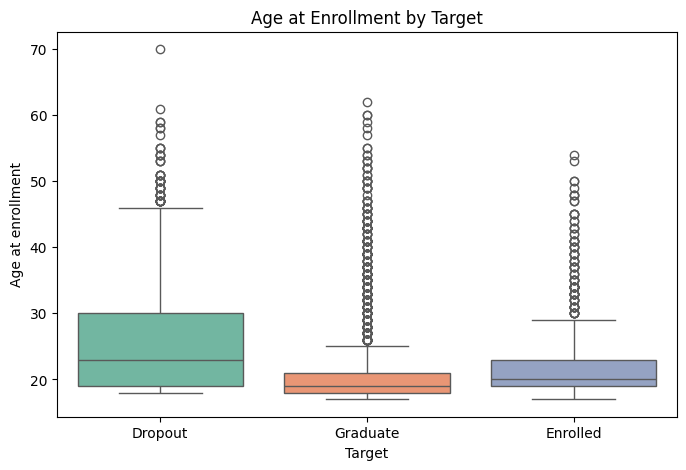

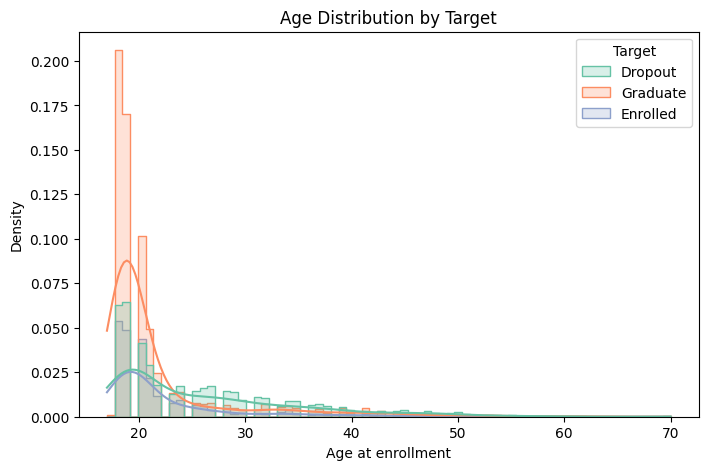

ANOVA results:
F-statistic = 154.712
p-value = 1.139e-65


In [44]:
from scipy.stats import f_oneway

# Columns
age_col = 'Age at enrollment'
target_col = 'Target'

# Drop NA
df_age = df[[age_col, target_col]].dropna()

# 1️⃣ Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=target_col, y=age_col, data=df_age, palette='Set2')
plt.title("Age at Enrollment by Target")
plt.show()

# 2️⃣ Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(data=df_age, x=age_col, hue=target_col, kde=True, palette='Set2', element="step", stat="density")
plt.title("Age Distribution by Target")
plt.show()

# 3️⃣ ANOVA test
dropout_age = df_age[df_age[target_col]=='Dropout'][age_col]
enrolled_age = df_age[df_age[target_col]=='Enrolled'][age_col]
graduate_age = df_age[df_age[target_col]=='Graduate'][age_col]

f_stat, p_val = f_oneway(dropout_age, enrolled_age, graduate_age)
print(f"ANOVA results:\nF-statistic = {f_stat:.3f}\np-value = {p_val:.3e}")

Wow! Với kết quả:

F-statistic ≈ 154.71

p-value ≈ 1.14×10⁻⁶⁵

Interpretation:

Null hypothesis (H0): Trung bình tuổi giữa các nhóm Target (dropout, enrolled, graduate) không khác nhau

Alternative hypothesis (H1): Có ít nhất 1 nhóm có trung bình tuổi khác

Vì p << 0.05, chúng ta bác bỏ H0 → kết luận:

Có sự khác biệt cực kỳ rõ ràng về tuổi giữa các nhóm sinh viên: dropout, enrolled, và graduate.
Trung bình tuổi không giống nhau giữa các nhóm, nên tuổi là một yếu tố có liên quan đến kết quả học tập.

Nhận xét từ Boxplot:
Tuổi Nhập học Lý tưởng: Sinh viên Graduate có trung vị tuổi nhập học thấp nhất và IQR hẹp nhất, cho thấy nhóm tốt nghiệp chủ yếu là những sinh viên truyền thống, nhập học ngay sau trung học (18-21 tuổi).

Tuổi Nhập học Cao & Rủi ro: Sinh viên Dropout có trung vị tuổi nhập học cao hơn rõ rệt và IQR rộng hơn nhiều. Điều này chứng tỏ nhóm bỏ học bao gồm cả sinh viên lớn tuổi hơn và sinh viên ngoài độ tuổi truyền thống.

Giá trị Ngoại lai: Cả ba nhóm đều có các giá trị ngoại lai kéo dài đến tuổi 70, đại diện cho sinh viên lớn tuổi hoặc sinh viên quay lại học.

2. Biểu đồ Phân phối Mật độ (Age Distribution by Target)
Biểu đồ này sử dụng histogram và KDE để trực quan hóa hình dạng phân phối tuổi của ba nhóm:

Nhận xét từ Density Plot:
Phân phối Tập trung (Graduate & Enrolled):

Cả nhóm Graduate (cam) và Enrolled (tím) đều có đỉnh mật độ cực kỳ cao, tập trung mạnh mẽ trong khoảng 18 đến 20 tuổi.

Điều này khẳng định rằng sinh viên trẻ tuổi là nhóm chiếm ưu thế và có khả năng cao hơn để theo học và tốt nghiệp.

Phân phối Trải rộng (Dropout):

Nhóm Dropout (xanh ngọc) cũng có một đỉnh ở độ tuổi 18-20, nhưng mật độ thấp hơn hai nhóm kia.

Tuy nhiên, nhóm Dropout cho thấy một phân phối rộng hơn kéo dài qua các độ tuổi 20, 30, 40, và thậm chí 50.

Phân phối của nhóm Dropout ít tập trung hơn, chứng tỏ rủi ro bỏ học tăng lên đáng kể đối với sinh viên nhập học muộn hơn.